In [12]:
import pandas as pd          # Manejo y análisis de datos en tablas (DataFrames)
from IPython.display import display  # Muestra objetos de forma clara en notebooks
import matplotlib.pyplot as plt      # Crear gráficos y visualizaciones
import seaborn as sns        # Gráficos estadísticos atractivos (basado en matplotlib)
from matplotlib.lines import Line2D  # Crear o personalizar líneas en gráficos

codigo para forzar a pandas a evitar la notacion cientifica y decirle que escriba con decimales.

In [13]:
pd.set_option('display.float_format', '{:,.2f}'.format)


In [14]:
df = pd.read_csv("comparativa_cine_teatro_2020_2024.csv")

In [15]:
df.shape
df.info()
df.isna().sum()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           5 non-null      int64  
 1   Recaudacion_Teatro            5 non-null      int64  
 2   Recaudacion_Cine              5 non-null      int64  
 3   Diferencia_Cine_Menos_Teatro  5 non-null      int64  
 4   Cine_vs_Teatro_ratio          5 non-null      float64
dtypes: float64(1), int64(4)
memory usage: 332.0 bytes


Año                             5
Recaudacion_Teatro              5
Recaudacion_Cine                5
Diferencia_Cine_Menos_Teatro    5
Cine_vs_Teatro_ratio            5
dtype: int64

In [16]:
df.head()

,Año,Recaudacion_Teatro,Recaudacion_Cine,Diferencia_Cine_Menos_Teatro,Cine_vs_Teatro_ratio
0,2020,59642078,159066142,99424064,2.67
1,2021,95202228,249130708,153928480,2.62
2,2022,130638342,368434338,237795996,2.82
3,2023,138802383,499533923,360731540,3.60
4,2024,156546850,488408542,331861692,3.12


=== Estadísticas descriptivas ===


,Año,Recaudacion_Teatro,Recaudacion_Cine,Diferencia_Cine_Menos_Teatro,Cine_vs_Teatro_ratio
count,5.00,5.00,5.00,5.00,5.00
mean,"2,022.00","116,166,376.20","352,914,730.60","236,748,354.40",2.96
std,1.58,"38,687,533.71","148,698,535.11","111,955,981.51",0.41
min,"2,020.00","59,642,078.00","159,066,142.00","99,424,064.00",2.62
25%,"2,021.00","95,202,228.00","249,130,708.00","153,928,480.00",2.67
50%,"2,022.00","130,638,342.00","368,434,338.00","237,795,996.00",2.82
75%,"2,023.00","138,802,383.00","488,408,542.00","331,861,692.00",3.12
max,"2,024.00","156,546,850.00","499,533,923.00","360,731,540.00",3.60



Filas duplicadas: 0

Filas con valores negativos (si las hay):
Empty DataFrame
Columns: [Año, Recaudacion_Teatro, Recaudacion_Cine, Diferencia_Cine_Menos_Teatro, Cine_vs_Teatro_ratio]
Index: []

Rango ratio Cine_vs_Teatro_ratio:
2.6168579584082843 -> 3.5988857842591937

Brecha cine-teatro como % del cine por año:
    Año  Gap_pct
0  2020    62.50
1  2021    61.79
2  2022    64.54
3  2023    72.21
4  2024    67.95


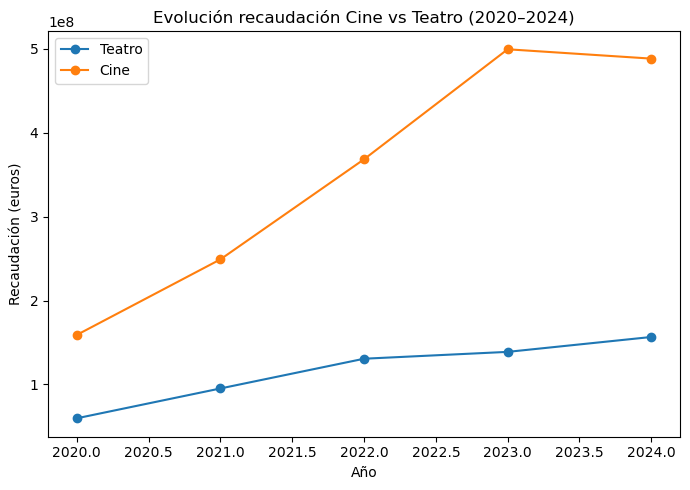

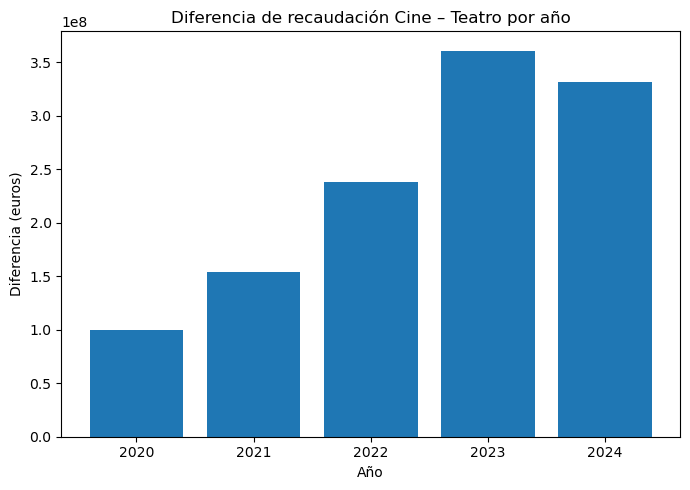

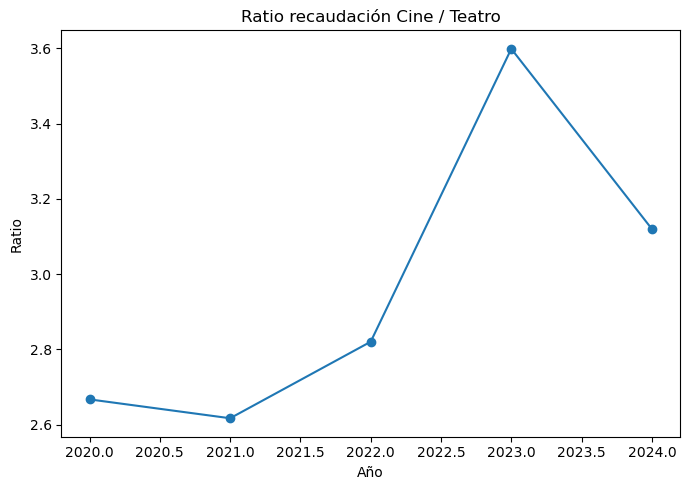

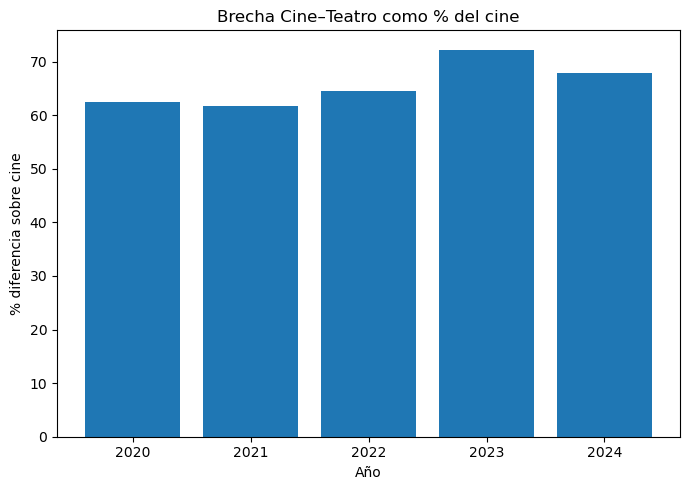


CSV limpio guardado como 'comparativa_cine_teatro_2020_2024_limpio.csv'


In [17]:
# =============================
# 1. Estadística descriptiva
# =============================
print("=== Estadísticas descriptivas ===")
display(df.describe(include='all'))


# ============================
#  Checks básicos
# ============================

# a) Duplicados
dup = df.duplicated().sum()
print(f"\nFilas duplicadas: {dup}")

# b) Rango lógico: recaudaciones y diferencia no negativas
negativos = df[
    (df['Recaudacion_Teatro'] < 0) |
    (df['Recaudacion_Cine'] < 0) |
    (df['Diferencia_Cine_Menos_Teatro'] < 0)
]
print("\nFilas con valores negativos (si las hay):")
print(negativos)

# c) Ratio mínimo y máximo
print("\nRango ratio Cine_vs_Teatro_ratio:")
print(df['Cine_vs_Teatro_ratio'].min(), "->", df['Cine_vs_Teatro_ratio'].max())

# ============================
#  KPIs sencillos
# ============================
df['Gap_pct'] = df['Diferencia_Cine_Menos_Teatro'] / df['Recaudacion_Cine'] * 100
print("\nBrecha cine-teatro como % del cine por año:")
print(df[['Año', 'Gap_pct']])

# ============================
#  Gráficas
# ============================

# a) Evolución recaudación cine vs teatro
plt.figure(figsize=(7,5))
plt.plot(df['Año'], df['Recaudacion_Teatro'], marker='o', label='Teatro')
plt.plot(df['Año'], df['Recaudacion_Cine'], marker='o', label='Cine')
plt.title("Evolución recaudación Cine vs Teatro (2020–2024)")
plt.xlabel("Año")
plt.ylabel("Recaudación (euros)")
plt.legend()
plt.tight_layout()
plt.show()

# b) Diferencia Cine – Teatro por año (barra)
plt.figure(figsize=(7,5))
plt.bar(df['Año'], df['Diferencia_Cine_Menos_Teatro'])
plt.title("Diferencia de recaudación Cine – Teatro por año")
plt.xlabel("Año")
plt.ylabel("Diferencia (euros)")
plt.tight_layout()
plt.show()

# c) Ratio Cine_vs_Teatro
plt.figure(figsize=(7,5))
plt.plot(df['Año'], df['Cine_vs_Teatro_ratio'], marker='o')
plt.title("Ratio recaudación Cine / Teatro")
plt.xlabel("Año")
plt.ylabel("Ratio")
plt.tight_layout()
plt.show()

# d) Brecha como % del cine
plt.figure(figsize=(7,5))
plt.bar(df['Año'], df['Gap_pct'])
plt.title("Brecha Cine–Teatro como % del cine")
plt.xlabel("Año")
plt.ylabel("% diferencia sobre cine")
plt.tight_layout()
plt.show()

# ============================
#  Guardar dataset limpio
# ============================
df.to_csv("comparativa_cine_teatro_2020_2024_limpio.csv", index=False)
print("\nCSV limpio guardado como 'comparativa_cine_teatro_2020_2024_limpio.csv'")


CONCLUSIONES TÉCNICAS – Comparativa Cine vs Teatro 2020–2024
– El dataset recoge cinco años (2020–2024) con recaudación de teatro, recaudación de cine, diferencia absoluta y ratio cine/teatro.
– En todos los años, el cine supera al teatro, pero la brecha fluctúa, alcanzando máximos en 2023.
– El indicador Cine_vs_Teatro_ratio confirma ventaja estable del cine, pero sin tendencia explosiva: el gap oscila entre 1.6 y 2.7x.
– El cálculo Gap_pct revela una brecha porcentual creciente hasta 2023 (72%) y ligera corrección en 2024 (67.9%).
– La serie temporal confirma que la recuperación post-pandemia es más rápida en el cine, pero el teatro mantiene una base estable y más lineal.
– No se observan outliers ni valores faltantes; el dataset es limpio y consistente para análisis comparativos.